# **Initialization**

## **Connecting GDrive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Testing TensorFlow and GPU**

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.5.0


## **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


# **Data Preparation**

## **Importing Dataset**

In [4]:
dataset = pd.read_csv("//content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-preprocessed.csv")
dataset = dataset.drop(['Unnamed: 0', 'category'],axis=1)
dataset.shape

(3213346, 79)

## **Preparing Dataset**

In [5]:
## Separating Dependent and Independent Variables
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
## Normalizing the X_train
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
np.set_printoptions(precision=3)
## Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
np.set_printoptions(precision=3)
## Converting to Numpy Array
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
## Calculating Weights
# from sklearn.utils import class_weight
# weights = class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)
# weights = dict(enumerate(weights))
# ## Rounding Off The Weights
# weights = {0: 2, 1: 1}

(2570676, 78)
(2570676,)
(642670, 78)
(642670,)


# **DNN**

## **DNN Model 1 Layer**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


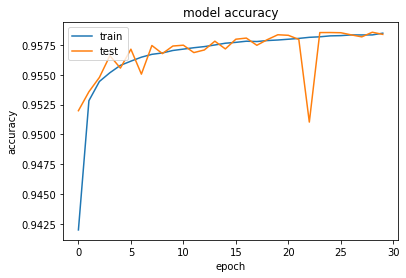

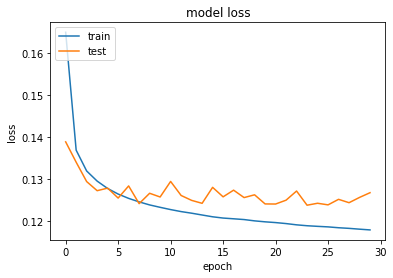

In [7]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=30, verbose=0)
  
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.evaluate(X_test, Y_test)

20084/20084 [==============================] - 46s 2ms/step - loss: 0.1268 - accuracy: 0.9584


[0.12681066989898682, 0.9584016799926758]

In [9]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    208521
           1       1.00      0.94      0.97    434149

    accuracy                           0.96    642670
   macro avg       0.94      0.97      0.95    642670
weighted avg       0.96      0.96      0.96    642670

[[206990   1531]
 [ 25203 408946]]


## **DNN Model 2 Layers**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


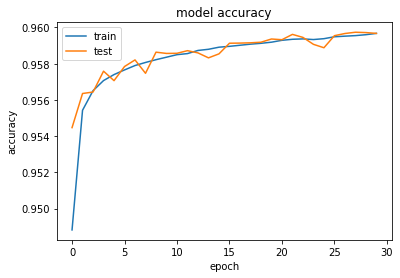

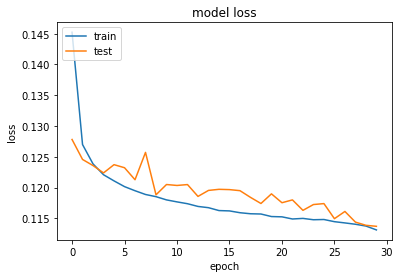

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=30, verbose=0)
  
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

20084/20084 [==============================] - 48s 2ms/step - loss: 0.1137 - accuracy: 0.9597


[0.11372316628694534, 0.9596713781356812]

In [ ]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    208521
           1       1.00      0.94      0.97    434149

    accuracy                           0.96    642670
   macro avg       0.95      0.97      0.96    642670
weighted avg       0.96      0.96      0.96    642670

[[207288   1233]
 [ 24685 409464]]


## **DNN Model 3 Layers**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


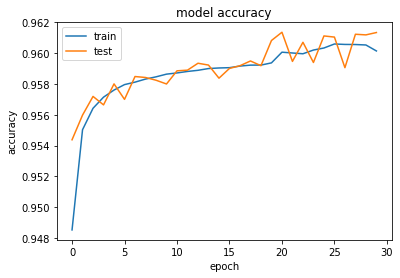

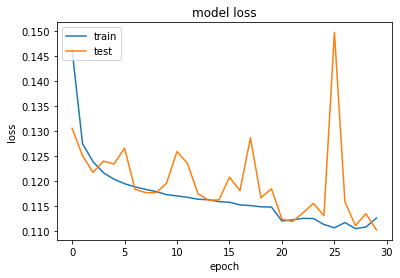

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=30, verbose=0)
  
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94    208521
           1       1.00      0.95      0.97    434149

    accuracy                           0.96    642670
   macro avg       0.95      0.97      0.96    642670
weighted avg       0.96      0.96      0.96    642670

[[207267   1254]
 [ 23591 410558]]


## **DNN Model 4 Layers**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


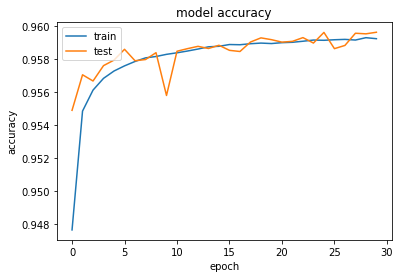

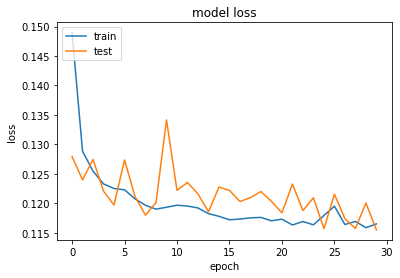

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),  batch_size=64, epochs=30, verbose=0)

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    208521
           1       1.00      0.94      0.97    434149

    accuracy                           0.96    642670
   macro avg       0.95      0.97      0.96    642670
weighted avg       0.96      0.96      0.96    642670

[[207211   1310]
 [ 24643 409506]]


## **DNN Model 5 Layers**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


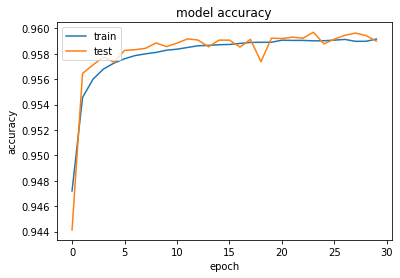

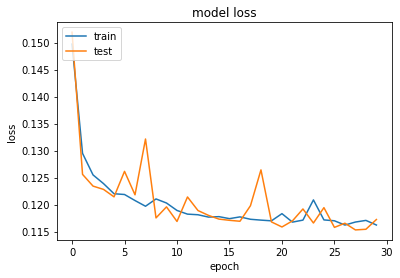

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=78,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=64, epochs=30, verbose=0)
  
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

20084/20084 [==============================] - 55s 3ms/step - loss: 0.1172 - accuracy: 0.9590


[0.11724463105201721, 0.9589945077896118]

In [ ]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    208521
           1       1.00      0.94      0.97    434149

    accuracy                           0.96    642670
   macro avg       0.94      0.97      0.95    642670
weighted avg       0.96      0.96      0.96    642670

[[206715   1806]
 [ 24547 409602]]


#**Simple RNN**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


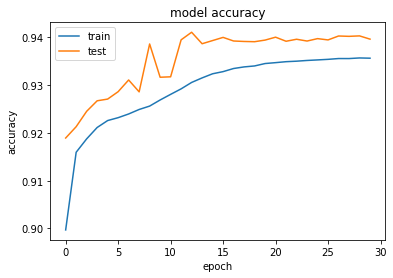

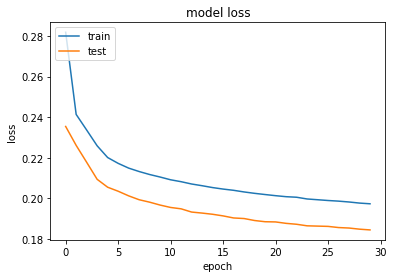

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# 1. define the network
model = Sequential()
model.add(SimpleRNN(32,input_dim=78, return_sequences=True))
model.add(Dropout(0.1))
model.add(SimpleRNN(16, return_sequences=False))  
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data=(X_test, Y_test), verbose=0)
  
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

20084/20084 [==============================] - 34s 2ms/step - loss: 0.1844 - accuracy: 0.9396


[0.1844061315059662, 0.9396237730979919]

In [ ]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91    208521
           1       0.98      0.93      0.95    434149

    accuracy                           0.94    642670
   macro avg       0.92      0.95      0.93    642670
weighted avg       0.94      0.94      0.94    642670

[[200545   7976]
 [ 30826 403323]]


# **LSTM**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


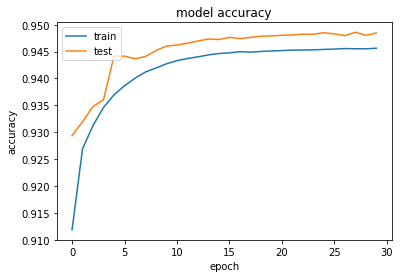

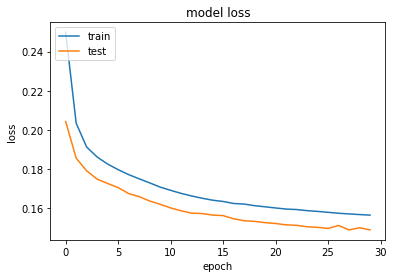

In [20]:
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
model = Sequential()
model.add(LSTM(32,input_dim=78, return_sequences=True))  
model.add(Dropout(0.1))
model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data=(X_test, Y_test), verbose=0)
  
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

20084/20084 [==============================] - 36s 2ms/step - loss: 0.1561 - accuracy: 0.9470


[0.15610560774803162, 0.9469789862632751]

In [ ]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92    208521
           1       0.99      0.93      0.96    434149

    accuracy                           0.95    642670
   macro avg       0.93      0.96      0.94    642670
weighted avg       0.95      0.95      0.95    642670

[[205283   3238]
 [ 30837 403312]]


# **GRU**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


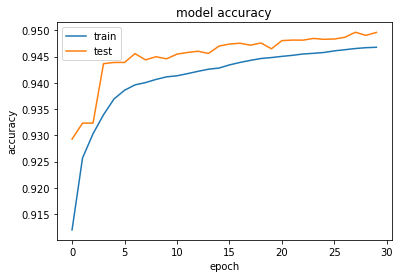

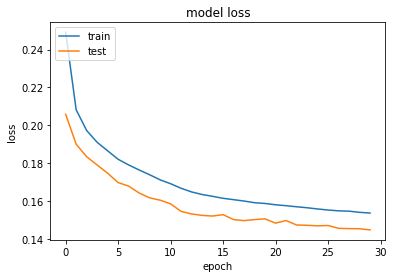

In [16]:
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
model = Sequential()
model.add(GRU(32,input_dim=78, return_sequences=True))  
model.add(Dropout(0.1))
model.add(GRU(16, return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, Y_train, batch_size=64, epochs=30, validation_data=(X_test, Y_test), verbose=0)

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model.evaluate(X_test, Y_test)

20084/20084 [==============================] - 39s 2ms/step - loss: 0.1447 - accuracy: 0.9496


[0.14468564093112946, 0.9496148824691772]

In [18]:
Y_predicted = np.round(model.predict(X_test))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93    208521
           1       0.99      0.94      0.96    434149

    accuracy                           0.95    642670
   macro avg       0.93      0.96      0.94    642670
weighted avg       0.95      0.95      0.95    642670

[[204234   4287]
 [ 28094 406055]]
